In [ ]:
!mkdir -p ~/.kaggle
!cp kaggle.json ~/.kaggle/
!chmod 600 ~/.kaggle/kaggle.json

In [ ]:
!kaggle datasets download -d omkargurav/face-mask-dataset --force

In [ ]:
from zipfile import ZipFile
dataset = 'face-mask-dataset.zip'
with ZipFile(dataset, 'r') as zip:
  zip.extractall()
  print("completed")


In [36]:
import os
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
import cv2
from google.colab.patches import cv2_imshow
from PIL import Image
from sklearn.model_selection import train_test_split

In [ ]:
with_mask_file = os.listdir('/content/data/with_mask')
print(with_mask_file[:8])

In [ ]:
without_mask_file = os.listdir('/content/data/without_mask')
print(without_mask_file[:8])

In [ ]:
print("mask images : ", len(with_mask_file))
print("without mask images : ", len(without_mask_file))

Labelling the images
with mask == 1
without mask == 0

In [ ]:
with_mask_labels = [1]*3725
without_mask_labels = [0]*3828

In [ ]:
print(with_mask_labels)

In [ ]:
labels = with_mask_labels + without_mask_labels
print(labels[0:5])
print(len(labels))

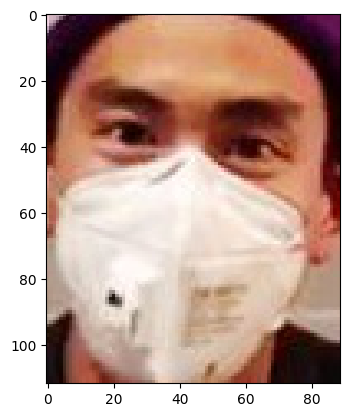

In [11]:
#displaying image
img = mpimg.imread('/content/data/with_mask/with_mask_658.jpg')
imgplot = plt.imshow(img)
plt.show()

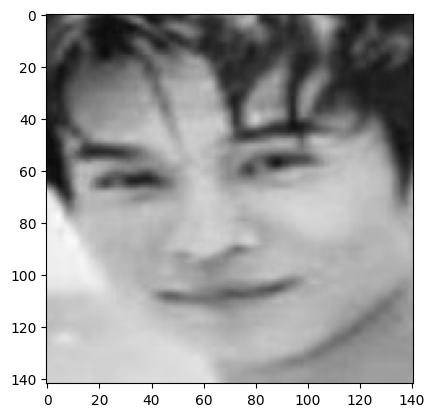

In [12]:
img = mpimg.imread('/content/data/without_mask/without_mask_328.jpg')
imgplot = plt.imshow(img)
plt.show()

**Image processing**

1. resize
2. convert to numpy array

In [13]:
with_mask_path = "/content/data/with_mask/"
data = []

for img_file in with_mask_file:
  image = Image.open(with_mask_path + img_file)
  image = image.resize((128,128))
  image = image.convert('RGB')
  image = np.array(image)
  data.append(image)

without_mask_path = "/content/data/without_mask/"


for img_file in without_mask_file:
  image = Image.open(without_mask_path + img_file)
  image = image.resize((128,128))
  image = image.convert('RGB')
  image = np.array(image)
  data.append(image)

/usr/local/lib/python3.10/dist-packages/PIL/Image.py:975: UserWarning: Palette images with Transparency expressed in bytes should be converted to RGBA images
  warnings.warn(


In [14]:
len(data)

7553

In [15]:
data[0]

array([[[201, 189, 193],
        [201, 189, 193],
        [201, 189, 193],
        ...,
        [198, 186, 190],
        [198, 186, 190],
        [198, 186, 190]],

       [[201, 189, 193],
        [201, 189, 193],
        [201, 189, 193],
        ...,
        [198, 186, 190],
        [198, 186, 190],
        [198, 186, 190]],

       [[201, 189, 193],
        [201, 189, 193],
        [201, 189, 193],
        ...,
        [198, 186, 190],
        [198, 186, 190],
        [198, 186, 190]],

       ...,

       [[204, 192, 202],
        [204, 192, 202],
        [205, 193, 203],
        ...,
        [201, 190, 198],
        [203, 192, 200],
        [201, 190, 198]],

       [[204, 192, 203],
        [204, 192, 203],
        [205, 193, 204],
        ...,
        [201, 190, 198],
        [203, 192, 200],
        [201, 190, 198]],

       [[204, 192, 203],
        [204, 192, 203],
        [205, 193, 204],
        ...,
        [201, 190, 198],
        [202, 191, 199],
        [201, 190, 198]]

In [16]:
data[0].shape

(128, 128, 3)

In [17]:
X = np.array(data)
y = np.array(labels)


In [18]:
print(X.shape, y.shape)

(7553, 128, 128, 3) (7553,)


In [19]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=2)

In [20]:
print(X.shape, X_train.shape, X_test.shape)

(7553, 128, 128, 3) (6042, 128, 128, 3) (1511, 128, 128, 3)


**SCALING**

In [21]:
X_train_scaled = X_train/255

X_test_scaled = X_test/255

In [22]:
X_train_scaled[0]

array([[[0.        , 0.28235294, 0.32156863],
        [0.01568627, 0.30588235, 0.34901961],
        [0.05490196, 0.3372549 , 0.38431373],
        ...,
        [0.03529412, 0.00392157, 0.03137255],
        [0.02352941, 0.00784314, 0.06666667],
        [0.03529412, 0.02745098, 0.04705882]],

       [[0.        , 0.28627451, 0.32156863],
        [0.01176471, 0.31372549, 0.34901961],
        [0.05490196, 0.3372549 , 0.38431373],
        ...,
        [0.03137255, 0.00784314, 0.0745098 ],
        [0.01960784, 0.00784314, 0.10196078],
        [0.02352941, 0.02352941, 0.06666667]],

       [[0.        , 0.28627451, 0.32941176],
        [0.01568627, 0.30980392, 0.36078431],
        [0.05490196, 0.34117647, 0.39607843],
        ...,
        [0.00392157, 0.00392157, 0.08235294],
        [0.00784314, 0.00784314, 0.09019608],
        [0.00392157, 0.02745098, 0.0627451 ]],

       ...,

       [[0.97254902, 0.97254902, 0.97254902],
        [0.97647059, 0.97647059, 0.97647059],
        [0.98431373, 0

**Building CNN** 

In [23]:
import tensorflow as tf
from tensorflow import keras
from keras import Sequential
from keras.layers import Conv2D, MaxPooling2D, Dropout, Dense, Flatten

In [24]:
model = Sequential()
model.add(Conv2D(32, kernel_size = (3,3), activation = 'relu', input_shape = (128,128,3)))
model.add(MaxPooling2D(pool_size=(2,2)))
model.add(Conv2D(64, kernel_size = (3,3), activation = 'relu'))
model.add(MaxPooling2D(pool_size=(2,2)))

model.add(Flatten())
model.add(Dense(128, activation = 'relu'))
model.add(Dropout(0.5))
model.add(Dense(64, activation = 'relu'))
model.add(Dropout(0.5))
    
model.add(Dense(2, activation = 'sigmoid'))


In [25]:
model.compile(optimizer = 'adam', loss = 'sparse_categorical_crossentropy', metrics = ['acc'])

In [26]:
history = model.fit(X_train_scaled, y_train, validation_split = 0.1, epochs = 5)

Epoch 1/5
170/170 [==============================] - 15s 24ms/step - loss: 0.4452 - acc: 0.8107 - val_loss: 0.3013 - val_acc: 0.8992
Epoch 2/5
170/170 [==============================] - 3s 17ms/step - loss: 0.2973 - acc: 0.8856 - val_loss: 0.1953 - val_acc: 0.9174
Epoch 3/5
170/170 [==============================] - 3s 17ms/step - loss: 0.2469 - acc: 0.8994 - val_loss: 0.1797 - val_acc: 0.9372
Epoch 4/5
170/170 [==============================] - 3s 17ms/step - loss: 0.2110 - acc: 0.9183 - val_loss: 0.1773 - val_acc: 0.9322
Epoch 5/5
170/170 [==============================] - 3s 19ms/step - loss: 0.1828 - acc: 0.9286 - val_loss: 0.1310 - val_acc: 0.9537


In [27]:
loss, accuracy = model.evaluate(X_test_scaled, y_test)
print('The Accuracy is: ', accuracy)

48/48 [==============================] - 0s 8ms/step - loss: 0.2263 - acc: 0.9166
The Accuracy is:  0.9166114926338196


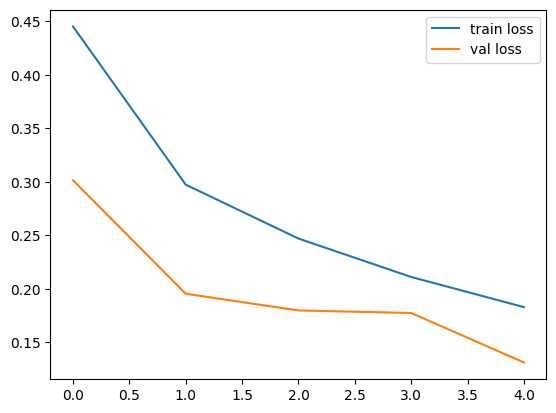

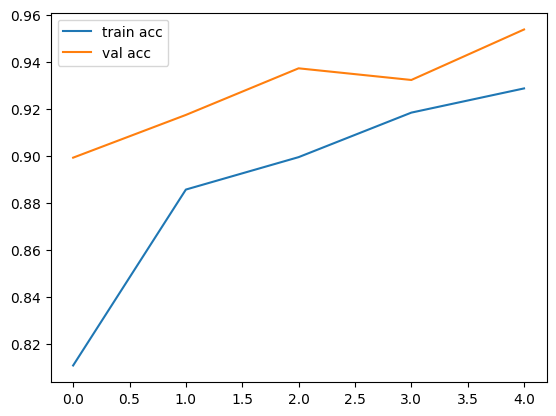

In [28]:
plt.plot(history.history['loss'], label = 'train loss')
plt.plot(history.history['val_loss'], label = 'val loss')
plt.legend()
plt.show()

plt.plot(history.history['acc'], label = 'train acc')
plt.plot(history.history['val_acc'], label = 'val acc')
plt.legend()
plt.show()



Enter the path of the image: /content/mask2.jpg


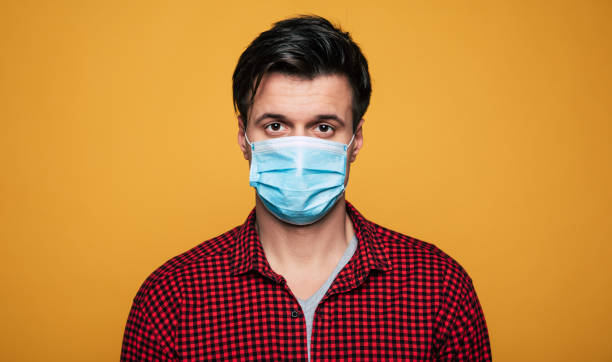

1/1 [==============================] - 0s 20ms/step
[[0.26752695 0.8239255 ]]
1
This person is wearing mask


In [43]:
input_image_path = input("Enter the path of the image: ")
input_image = cv2.imread(input_image_path)
cv2_imshow(input_image)

image_resize = cv2.resize(input_image, (128, 128))
image_scale = image_resize/255
image_reshape = np.reshape(image_scale, [1,128,128,3])
prediction = model.predict(image_reshape)
print(prediction)

output = np.argmax(prediction)
print(output)

if output == 1:
  print("This person is wearing mask")
else:
  print("This person is not wearing mask")




In [44]:
import pickle
pickle.dump(model,open('model.pkl', 'wb'))